In [1]:
%config Completer.use_jedi = False

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

input_folder = '/data/home/shim/pyspace/fairness/dataset/scans_new_temp/'

    
# for file in os.listdir(input_folder):
#     if file.endswith('.npz'):
#         raw_data = np.load(os.path.join(input_folder, file), allow_pickle=True)
#         print(os.path.join(input_folder, file))
#         assert raw_data['oct_bscans'].shape==(200, 200, 200), f'{file}'

In [22]:
# npz_file = 'data_035999_8026733_year=2023_gender=0_race=1_ethnicity=0.npz'
npz_file = 'data_044593_9680771_year=2022_gender=1_race=2_ethnicity=0.npz'
raw_data = np.load(os.path.join(input_folder, npz_file), allow_pickle=True)
oct_bscans = raw_data['oct_bscans']
print(oct_bscans.shape)
print(raw_data['datadir'])

(200, 200, 200)
1.2.276.0.75.2.2.42.215507184101704.20221109131612509.2216542460


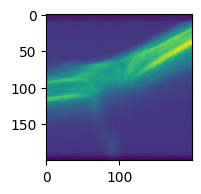

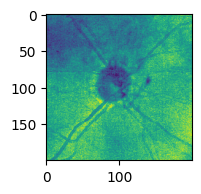

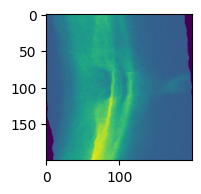

In [21]:
plt.subplot(131)
plt.imshow(np.mean(oct_bscans, axis=0))
plt.show()

plt.subplot(132)
plt.imshow(np.mean(oct_bscans, axis=1))
plt.show()

plt.subplot(133)
plt.imshow(np.mean(oct_bscans, axis=2))
plt.show()

(200, 200, 3)


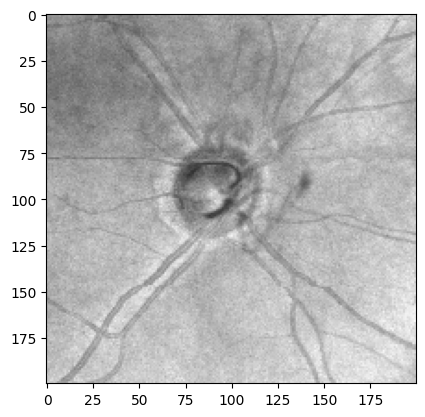

In [41]:
data_dir = f'/data/home/luoy/external20TB_1/cirrus_from_dicom/scans/{raw_data["datadir"]}'
fundus = cv2.imread(os.path.join(data_dir, 'octfundusimg.jp2'))
fundus = fundus / fundus.max() * 255
fundus = fundus.astype(np.uint8)
# fundus = cv2.rotate(fundus, cv2.ROTATE_90_CLOCKWISE)
fundus = cv2.flip(fundus, 1)
fundus = cv2.resize(fundus, (200, 200))
plt.imshow(fundus)



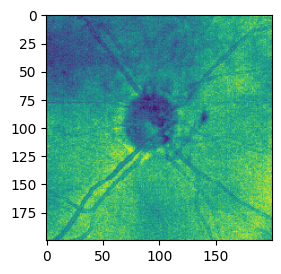

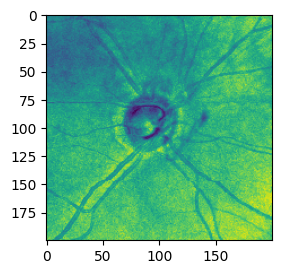

17.45639600162225


In [43]:
plt.subplot(121)
plt.imshow(np.mean(oct_bscans, axis=1))
plt.show()

plt.subplot(122)
plt.imshow(np.mean(fundus, axis=2))
plt.show()

aa = np.mean(oct_bscans, axis=1)
bb = np.mean(fundus, axis=2)

cc = np.sqrt( np.sum(((aa-aa.min())/(aa.max()-aa.min()) - (bb-bb.min())/(bb.max()-bb.min()))**2) )
print(cc)